1. Criar um repositório no Github para o projeto 
2. Criar um README.md com o título do projeto, nomes dos integrantes e dataset(s) utilizado(s)
3. Colocar o(s) dataset(s) utilizados no repositório
4. Criar um Jupyter Notebook para iniciar a exploração dos datasets
5. No notebook, calcular medidas de centralidade e dispersão dos valores disponíveis nos datasets
6. No notebook, criar boxplots para os dados disponíveis nos datasets

In [393]:
# Os dados estavam em outro tipo de codificação, tivemos que converter para utf-8, e como a maioria
# dos dados brasileiros os números float estavam separados por ',' e não '.', assim precisamos dar um replace,
# e as colunas separadas por ';', o que precisou de outro replace.

# with open('datatran2020.csv', 'r') as f:
#     result = str(f.read())
#     result = result.replace(",",".")
#     result = result.replace(";",",")
#     f.close
    
# with open('datatran2020-worked.csv', 'w') as f:
#     f.write(result)
#     f.close


In [394]:
import pandas as pd

In [395]:
import seaborn as sns
sns.set_palette('Set2')

# Definição dos dados

**Definindo o arquivo de dados como df (dataframe).**

In [396]:
df = pd.read_csv('datatran2020-worked.csv')

**Utilizando o comando .head() da biblioteca pandas para receber a quantidade de filas e colunas.**

In [397]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,678.1,GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178.0,NOVA IGUACU,Falta de Aten��o do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,206.9,SAO JOSE,Ingest�o de �lcool,Colis�o lateral,...,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236.0,CACOAL,Velocidade Incompat�vel,Sa�da de leito carro��vel,...,1,0,0,1,1,-11.446246,-61.437612,SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360.0,REBOUCAS,Ingest�o de �lcool,Capotamento,...,4,0,0,6,1,-25.675038,-50.750898,SR-PR,DEL7/3,UOP04/PR


**Utilização do comando .info() para receber um sumario dos dados recebidos**

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45368 entries, 0 to 45367
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45368 non-null  float64
 1   data_inversa            45368 non-null  object 
 2   dia_semana              45368 non-null  object 
 3   horario                 45368 non-null  object 
 4   uf                      45368 non-null  object 
 5   br                      45253 non-null  float64
 6   km                      45253 non-null  float64
 7   municipio               45368 non-null  object 
 8   causa_acidente          45368 non-null  object 
 9   tipo_acidente           45368 non-null  object 
 10  classificacao_acidente  45368 non-null  object 
 11  fase_dia                45368 non-null  object 
 12  sentido_via             45368 non-null  object 
 13  condicao_metereologica  45368 non-null  object 
 14  tipo_pista              45368 non-null

**Utilização de isna().sum() para detectar os valores nulos dos dados.**

In [399]:
df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        115
km                        115
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64

# Edição dos dados recebidos

**Atualizando o numero das brs e kilometros, e definindo o uop como não cadastrado.**


In [400]:
df.update(df[['br','km']].fillna('0'))
df.update(df[['uop']].fillna('nao cadastrado'))

**Uso do .mean para retornar o numero escalar de pessoas.**

In [401]:
df.pessoas.mean()

2.3008067360253923

**Lista dos acidentes categorizados por causa do acidente, e com os numeros de pessoas, mortos, feridos, ilesos, ignorados e veiculos organizados de forma decrescente na coluna mortos.**


In [402]:
acidentes = df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','ignorados','veiculos','causa_acidente' ]].groupby(by = 'causa_acidente').sum().sort_values(by = 'mortos', ascending = False)

acidentes

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,veiculos
causa_acidente,,,,,,,
Falta de Aten��o � Condu��o,36548,860,14011,3869,15398,2410,27388
Desobedi�ncia �s normas de tr�nsito pelo condutor,16422,599,5345,2127,7029,1322,12312
Velocidade Incompat�vel,8766,517,3673,1234,2779,563,5736
Falta de Aten��o do Pedestre,2836,403,549,492,977,415,1333
Ingest�o de �lcool,7941,225,2429,829,3862,596,5729
Ultrapassagem Indevida,2583,221,826,423,909,204,1622
Condutor Dormindo,3097,180,1379,444,973,121,1981
Desobedi�ncia �s normas de tr�nsito pelo pedestre,715,90,138,108,255,124,341
Defeito Mec�nico no Ve�culo,5206,87,2022,380,2501,216,3442


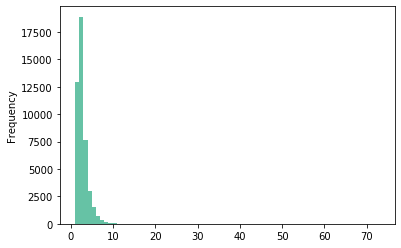

In [403]:
df['pessoas'].plot.hist(bins=73)

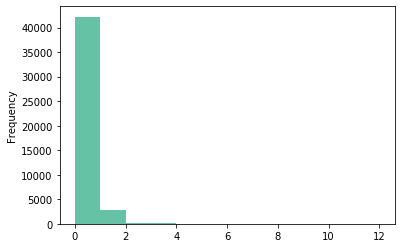

In [404]:
df['mortos'].plot.hist(bins=12)

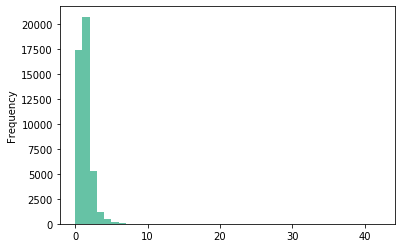

In [405]:
df['feridos_leves'].plot.hist(bins=42)

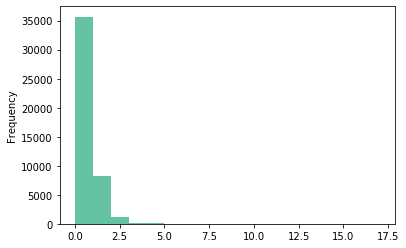

In [406]:
df['feridos_graves'].plot.hist(bins=17)

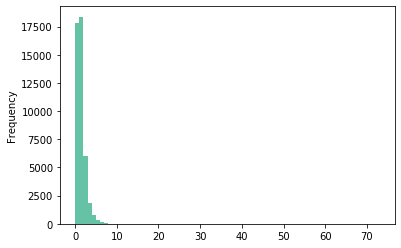

In [407]:
df['ilesos'].plot.hist(bins=73)

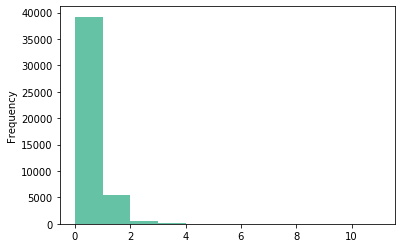

In [408]:
df['ignorados'].plot.hist(bins=11)

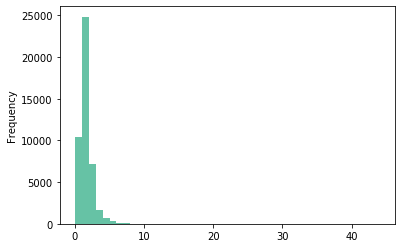

In [409]:
df['feridos'].plot.hist(bins=44)

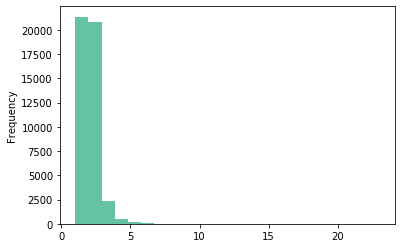

In [410]:
df['veiculos'].plot.hist(bins=23)

# Medidas de Centralidade e Dispersão

**Utilizando .select_dtypes para retornar as colunas numéricas, e criando um dataframe com as medidas de centralidade e dispersão dessas colunas.**

In [411]:

measures = pd.DataFrame()

measures['Máximo'] = df.select_dtypes(include=['int64']).max()

measures['Média'] = df.select_dtypes(include=['int64']).mean()

measures['Mediana'] = df.select_dtypes(include=['int64']).median()

d = df.select_dtypes(include=['int64']).mode()

measures['Moda'] = d.iloc[0] 

measures['Desvio Padrão'] = df.select_dtypes(include=['int64']).std()


measures
              



,Máximo,Média,Mediana,Moda,Desvio Padrão
pessoas,73,2.300807,2.0,2,1.700060
mortos,12,0.081048,0.0,0,0.332745
feridos_leves,42,0.851658,1.0,1,1.013929
feridos_graves,17,0.260999,0.0,0,0.585655
ilesos,73,0.951023,1.0,1,1.330344
ignorados,11,0.156079,0.0,0,0.431112
feridos,44,1.112656,1.0,1,1.112366
veiculos,23,1.626852,2.0,1,0.724634


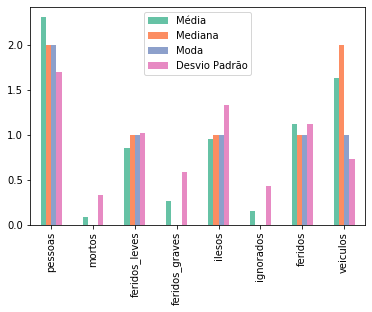

In [412]:
measures.iloc[:,1:].plot.bar()

**Usando a função .boxplot() para plotar os boxplots do dataframe formado pelas colunas numéricas.**

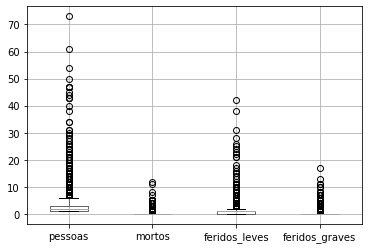

In [413]:
df.select_dtypes(include=['int64']).iloc[:,:4].boxplot()

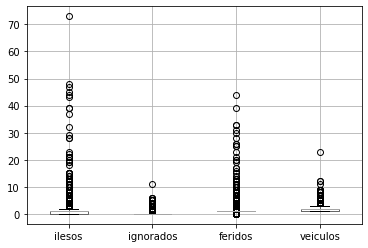

In [414]:
df.select_dtypes(include=['int64']).iloc[:,4:].boxplot()

# Categorização dos dados recebidos

**Organização em grupo das causas de acidentes e a quantidade de acidentes ,em forma decrescente, em cada causa do acidente.**


In [415]:
df.groupby('causa_acidente').size().sort_values(ascending = False)

causa_acidente
Falta de Aten��o � Condu��o                                                       15899
Desobedi�ncia �s normas de tr�nsito pelo condutor                                  6251
Velocidade Incompat�vel                                                            4190
Ingest�o de �lcool                                                                 3662
Defeito Mec�nico no Ve�culo                                                        2729
N�o guardar dist�ncia de seguran�a                                                 2516
Condutor Dormindo                                                                  1494
Pista Escorregadia                                                                 1410
Falta de Aten��o do Pedestre                                                       1205
Animais na Pista                                                                   1072
Ultrapassagem Indevida                                                              790
Defeito na Via   

**Organização em grupo dos tipos de acidentes e a quantidade de acidentes ,em forma decrescente, em cada tipo de acidente.**


In [416]:
df.groupby('tipo_acidente').size().sort_values(ascending = False)

tipo_acidente
Colis�o traseira                   8086
Sa�da de leito carro��vel          7445
Colis�o transversal                5608
Colis�o lateral                    5279
Tombamento                         4058
Colis�o com objeto est�tico        3526
Colis�o frontal                    3068
Atropelamento de Pedestre          2078
Queda de ocupante de ve�culo       2051
Capotamento                        1306
Atropelamento de Animal             880
Inc�ndio                            836
Engavetamento                       626
Colis�o com objeto em movimento     189
Danos eventuais                     180
Derramamento de carga               152
dtype: int64

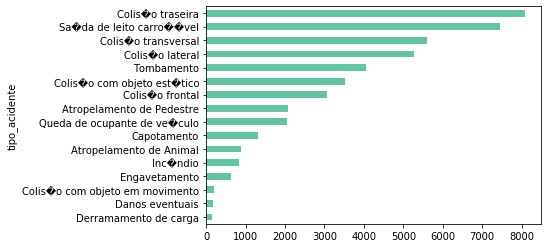

In [417]:
types = df.groupby('tipo_acidente').size().sort_values(ascending = True)


types.plot.barh()

**Organização dos municipios e a quantidade de acidentes ,em forma decrescente, em cada municipio.**


In [418]:
df.groupby('municipio').size().sort_values(ascending = False)[0:20].to_frame().rename(columns={0:'Quantidade'})

,Quantidade
municipio,
BRASILIA,757
CURITIBA,700
SAO JOSE,456
GUARULHOS,452
PALHOCA,426
SERRA,377
DUQUE DE CAXIAS,373
BETIM,373
PORTO VELHO,316


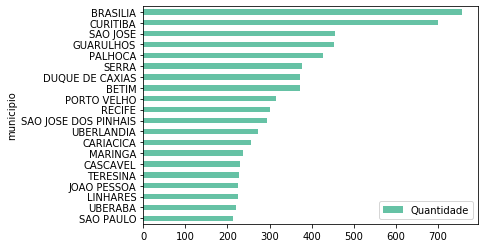

In [419]:
cities = df.groupby('municipio').size().sort_values(ascending = True)[-20:].to_frame().rename(columns={0:'Quantidade'})

cities.plot.barh()

**Organização das Unidades Federativas e a quantidade de acidentes ,em forma decrescente, em cada Unidade Federativa.**


In [420]:
df.groupby('uf').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

,Quantidade
uf,
MG,5934
SC,5261
PR,5201
RS,3018
RJ,2982
SP,2844
BA,2479
GO,2336
PE,1827


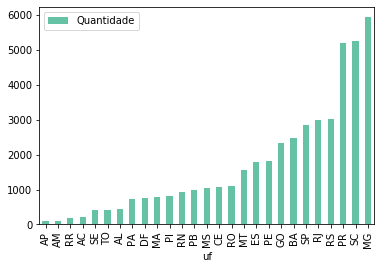

In [421]:
states = df.groupby('uf').size().sort_values(ascending = True).to_frame().rename(columns={0:'Quantidade'})

states.plot.bar()

**Organização das brs (rodovias) e a quantidade de acidentes ,em forma decrescente, em cada rodovia.**


In [422]:
df.groupby('br').size().sort_values(ascending = False)[0:20].to_frame().rename(columns={0:'Quantidade'})

,Quantidade
br,
101.0,7528
116.0,6469
40.0,2155
381.0,2142
153.0,1835
364.0,1601
163.0,1461
277.0,1355
262.0,1226


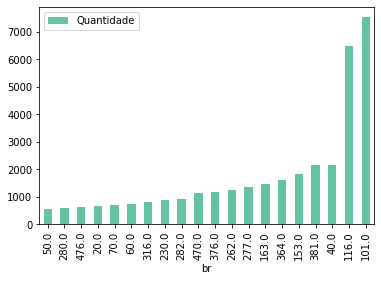

In [423]:
highways = df.groupby('br').size().sort_values(ascending = True)[-20:].to_frame().rename(columns={0:'Quantidade'})

highways.plot.bar()

**Organização das datas em que ocorreram os acidentes e a quantidade de acidentes em forma decrescente.**


In [424]:
df.groupby('data_inversa').size().sort_values(ascending = False)[0:20].to_frame().rename(columns={0:'Quantidade'})

,Quantidade
data_inversa,
2020-09-05,268
2020-02-22,263
2020-09-04,248
2020-08-09,244
2020-09-06,239
2020-08-30,239
2020-09-27,237
2020-08-29,237
2020-03-08,233


**Organização dos dias da semana e a quantidade de acidentes ,em forma decrescente, em cada dia.**


In [425]:
df.groupby('dia_semana').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

,Quantidade
dia_semana,
s�bado,7476
domingo,7436
sexta-feira,7043
segunda-feira,6092
quarta-feira,5923
quinta-feira,5772
ter�a-feira,5626


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a9d7fd550>],
      dtype=object)

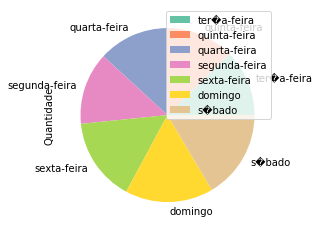

In [426]:
days = df.groupby('dia_semana').size().sort_values(ascending = True).to_frame().rename(columns={0:'Quantidade'})

days.plot.pie(subplots = True)

**Organização dos tipos de pista e a quantidade de acidentes ,em forma decrescente, em cada tipo de pista.**


In [427]:
tracks = df.groupby('tipo_pista').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

tracks

,Quantidade
tipo_pista,
Simples,23120
Dupla,18643
M�ltipla,3605


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a9d8072d0>],
      dtype=object)

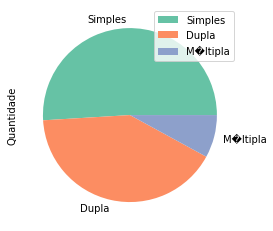

In [428]:
tracks.plot.pie(subplots = True)

**Organização dos tipos das vias e a quantidade de acidentes ,em forma decrescente, em cada tipo de via.**


In [429]:
df.groupby('tracado_via').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

,Quantidade
tracado_via,
Reta,27391
Curva,7047
N�o Informado,5429
Interse��o de vias,2083
Desvio Tempor�rio,1331
Rotat�ria,919
Retorno Regulamentado,560
Viaduto,332
Ponte,219


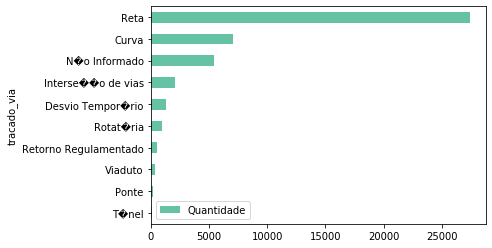

In [430]:
layout = df.groupby('tracado_via').size().sort_values(ascending = True).to_frame().rename(columns={0:'Quantidade'})

layout.plot.barh()

**Organização das fases do dia e a quantidade de acidentes ,em forma decrescente, em cada fase do dia.**


In [431]:
quant_phases = df.groupby('fase_dia').size().sort_values(ascending = False).to_frame().rename(columns={0:'Quantidade'})

quant_phases

,Quantidade
fase_dia,
Pleno dia,24305
Plena Noite,16430
Anoitecer,2600
Amanhecer,2033


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a9d6d95d0>],
      dtype=object)

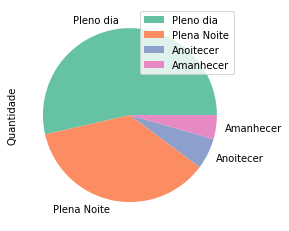

In [432]:
quant_phases.plot.pie(subplots = True)

**Organização das fases do dia e a quantidade de mortos ,em forma decrescente, em cada fase do dia.**


In [433]:
dies_phases = df.groupby('fase_dia')['mortos'].sum().sort_values(ascending = False).to_frame()

dies_phases

,mortos
fase_dia,
Plena Noite,1890
Pleno dia,1354
Amanhecer,249
Anoitecer,184


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a9d641a90>],
      dtype=object)

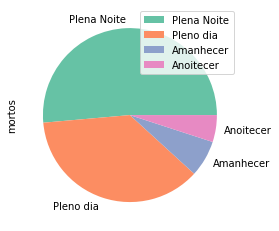

In [434]:
dies_phases.plot.pie(subplots = True)

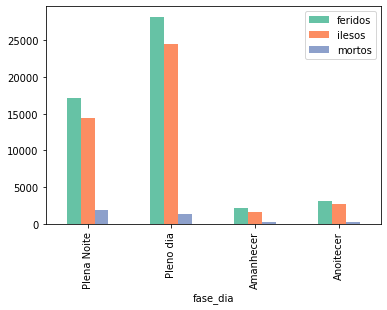

In [435]:
dies_phases['feridos'] = df.groupby('fase_dia')['feridos'].sum().sort_values(ascending = False)
dies_phases['ilesos'] = df.groupby('fase_dia')['ilesos'].sum().sort_values(ascending = False)

phases = dies_phases[['feridos','ilesos','mortos']]

phases.plot.bar()

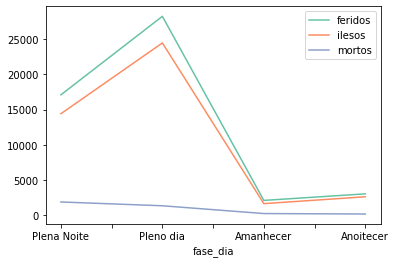

In [436]:
phases.plot.line()